# <p style="background-color:#19747E;font-family:newtimeroman;color:#102446;font-size:100%;text-align:center;border-radius:40px 40px;">About Data</p>

Columns :

- index: The index of the dataframe.
- A_id: The ID of the item.
- Size: The size of the item in some unit of measurement.
- Weight: The weight of the item in some unit of measurement.
- Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
- Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
- Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
- Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
- Acidity: The level of acidity of the item on a scale from very low to very high.
- Quality: The overall quality rating of the item, either "good" or "bad".

Potential Use Cases:

- Fruit Classification: Develop a classification model to categorize fruits based on their features.
- Quality Prediction: Build a model to predict the quality rating of fruits using various attributes.

<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Importing Data & Libraries</p>

In [14]:
import pandas as pd
import numpy as np

import optuna
import pickle

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots

import missingno as msno
from scipy import stats
from colorama import  Fore, Style, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, cross_val_score, cross_val_predict, StratifiedKFold, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import VotingClassifier, VotingRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, precision_score, average_precision_score, confusion_matrix, recall_score, f1_score, make_scorer, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import lightgbm as lgb
from catboost import CatBoostClassifier

# palette = ['#328ca9', '#0e6ea9', '#2c4ea3', '#193882', '#102446']
palette = ["#D1E8E2", "#19747E", "#A9D6E5", "#E2E2E2"]
color_palette = sns.color_palette(palette)

import warnings
warnings.filterwarnings ('ignore')

sns.set(style="whitegrid")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv("apple_quality.csv")
df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 9 columns]

<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 |Data Overview</p>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [17]:
# Dropping Id 
df.drop(columns=['A_id'], inplace=True)
df.dropna(inplace=True)    
df = df.astype({'Acidity': 'float64'})

In [18]:
df.describe().T.style.background_gradient(axis=0, cmap='viridis')

In [19]:
# Text Color
def PrintColor(text: str, color=Fore.CYAN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

# Main Heading
def print_heading(text):
    PrintColor('=====================', Fore.BLUE + Style.BRIGHT)
    print_blue_large(text)
    PrintColor('=====================', Fore.BLUE + Style.BRIGHT)
    
# Function to Overview Data
def data_overview(tr_d):
    # Display head of the training dataset nicely
    print_heading("The Head Of Train Dataset is:")
    print(tr_d.head(5).to_string(index=False))
    
    print('\n')

    # Shapes of Train
    print_heading("Shape Information:")
    PrintColor(f"The Shape Of Train Data is {tr_d.shape} || No of Rows is : {tr_d.shape[0]} and Columns is {tr_d.shape[1]}", Fore.CYAN)
    print('\n')

    # Info of Train Dataset
    print_heading("Dataset Information:")
    PrintColor(f"\nThe Info Of Train Dataset", Fore.CYAN)
    tr_d.info()
    print('\n')

    # Describe Train
    print_heading("Numerical Summary:")
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.CYAN)
    print(tr_d.describe().to_string(index=True))
    print('\n')

    # Null Values in Train
    print_heading("Null Values:")
    PrintColor("\nNull Values in Train", Fore.CYAN)
    print(tr_d.isnull().sum())
    print('\n')

    # Duplicates Values in Train
    print_heading("Duplicate Values:")
    PrintColor("\nDuplicates Values in Train", Fore.CYAN)
    print(tr_d.duplicated().sum())

In [20]:
# Data Overview
data_overview(df)

The Head Of Train Dataset is:
     Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity Quality
-3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590    good
-1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809    good
-0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636     bad
-0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723    good
 1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984    good


Shape Information:
The Shape Of Train Data is (4000, 8) || No of Rows is : 4000 and Columns is 8


Dataset Information:

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchi

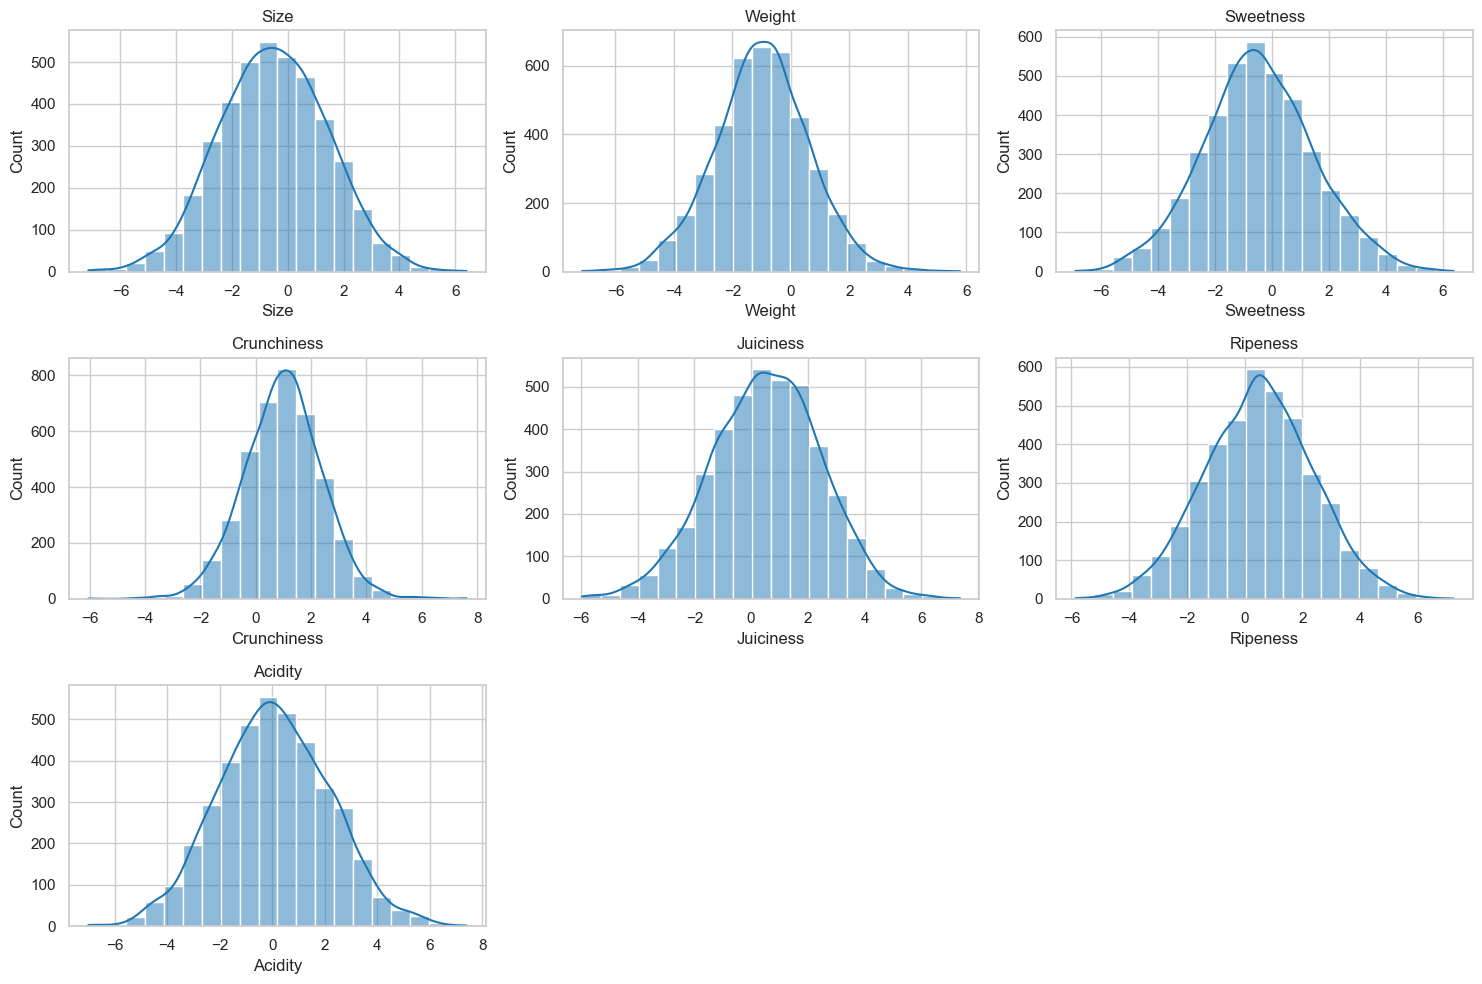

In [21]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()

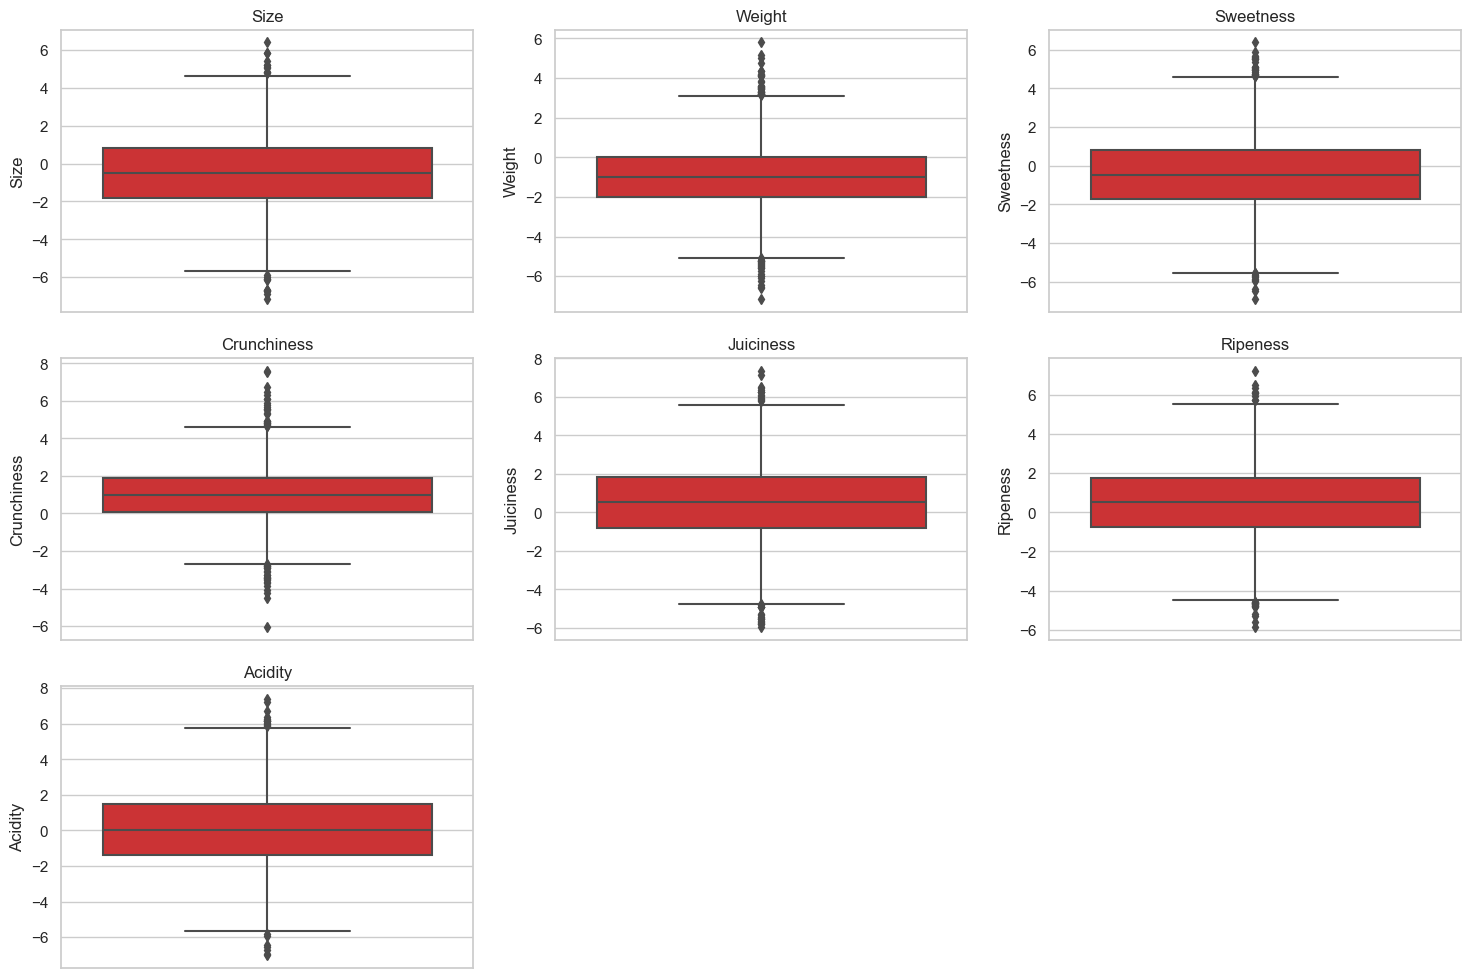

In [22]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

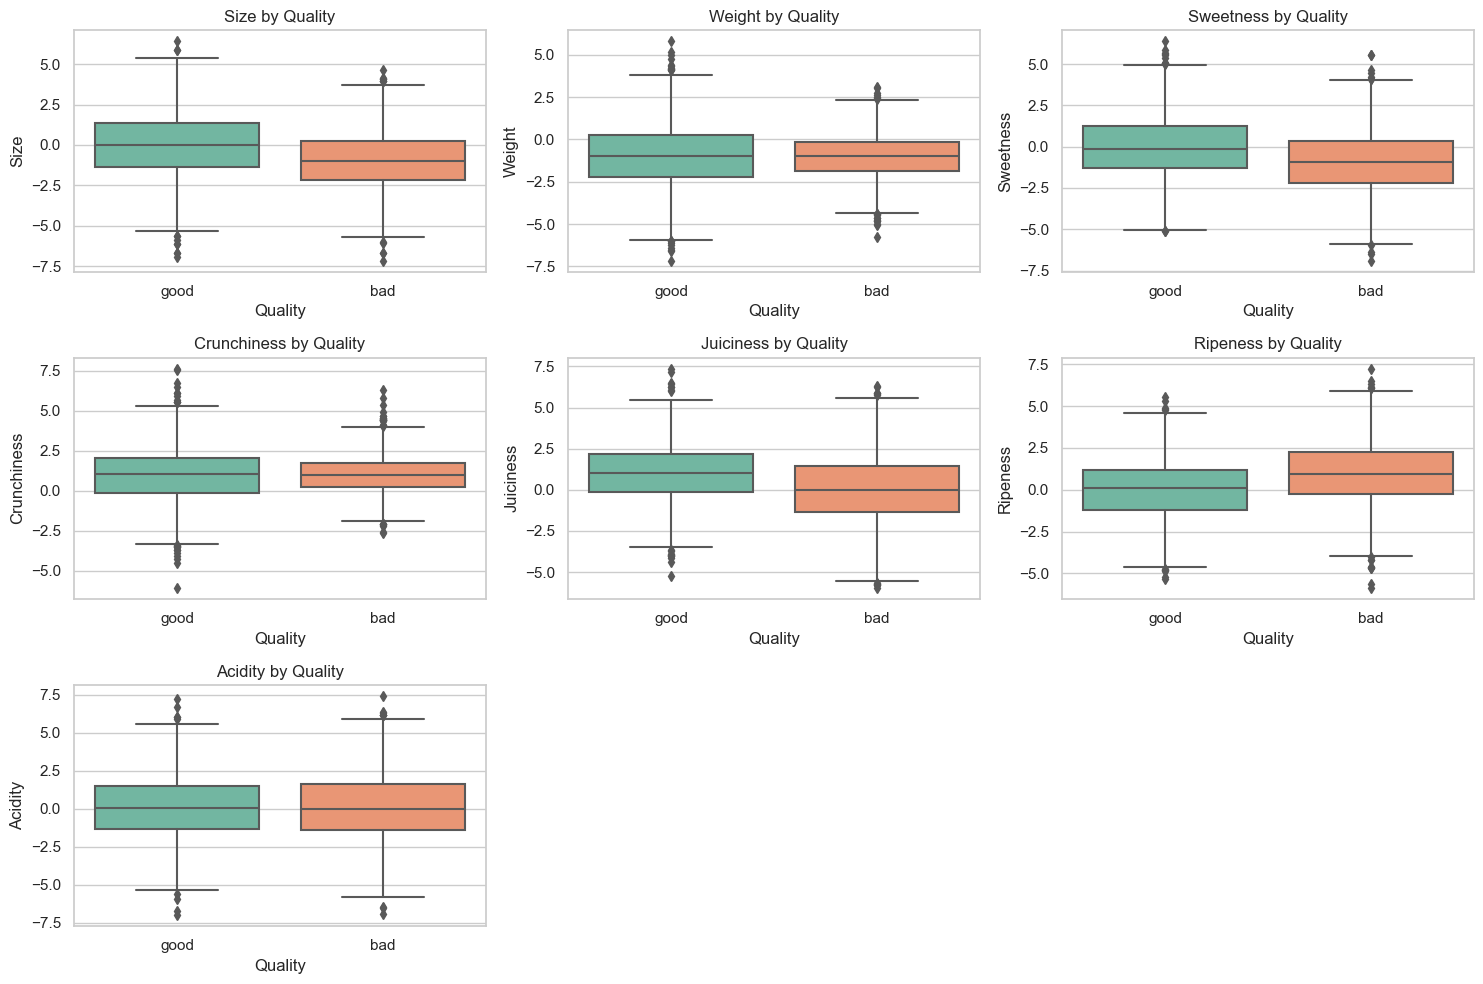

In [23]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(df.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality', y=column, data=df)
    plt.title(f'{column} by Quality')

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

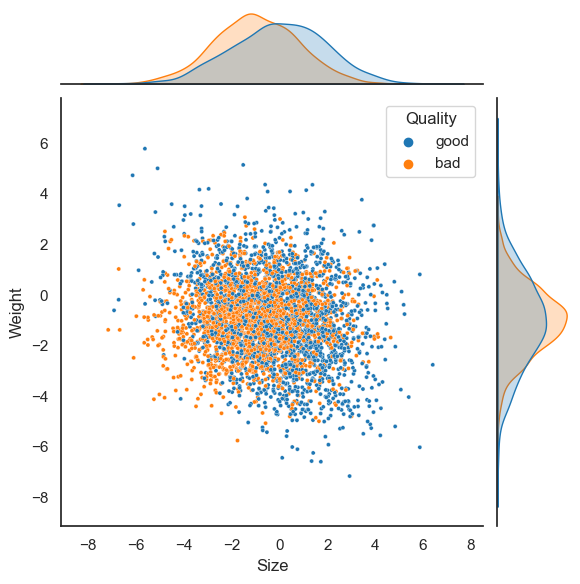

In [24]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Size', y='Weight', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

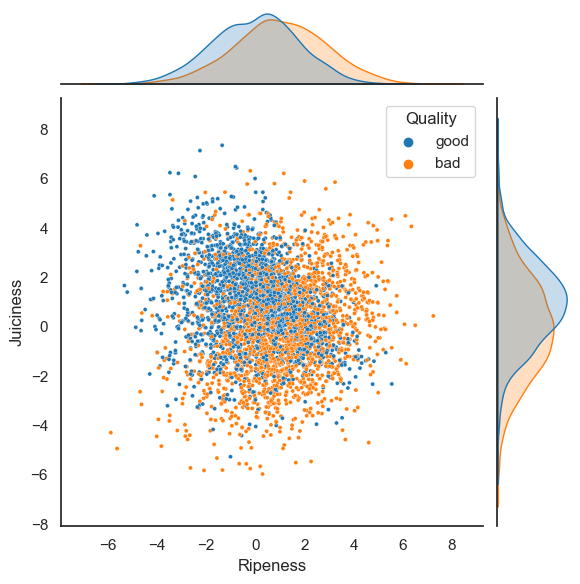

In [25]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Ripeness', y='Juiciness', hue='Quality', data=df, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

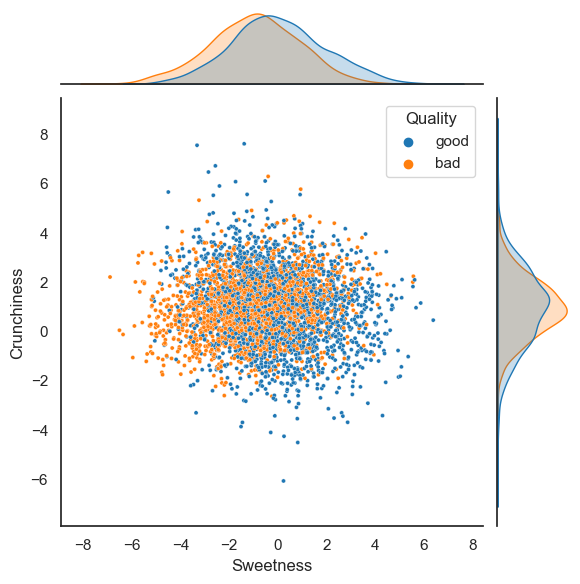

In [26]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Quality', data=df, palette='tab10', s=9)

In [27]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()


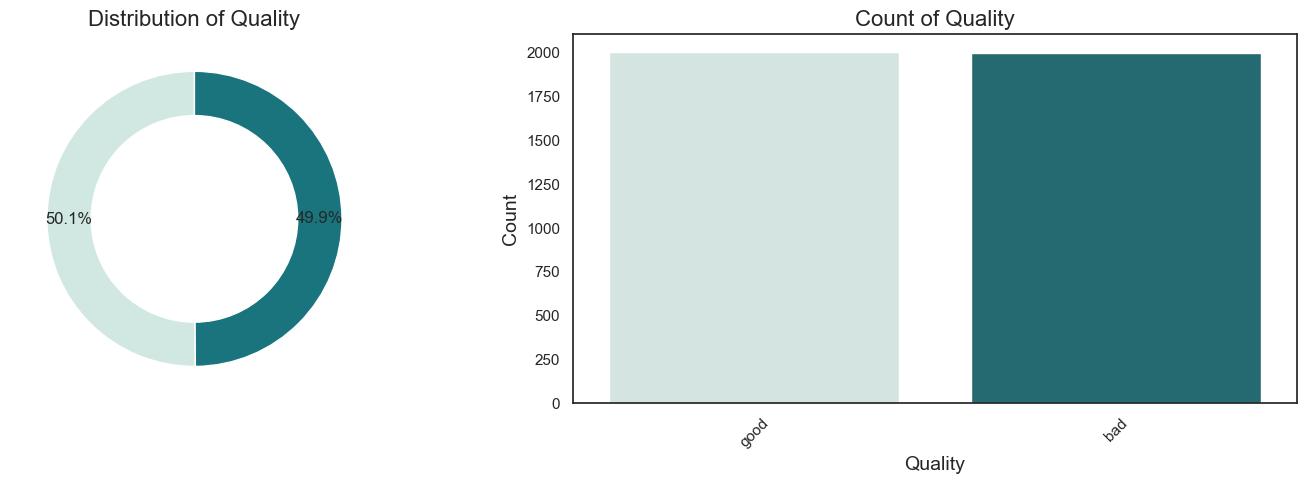

In [28]:
single_plot_distribution('Quality', df)

In [29]:
# Scatter Plot to Show Realationship Bw 2 Cols
def advanced_scatter_plot(x_column, y_column, target_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=target_column, data=dataframe, palette=palette[0:3])
    plt.title(f'Scatter Plot of {x_column} vs {y_column} Hue by {target_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=target_column)
    plt.grid(True)
    plt.show()

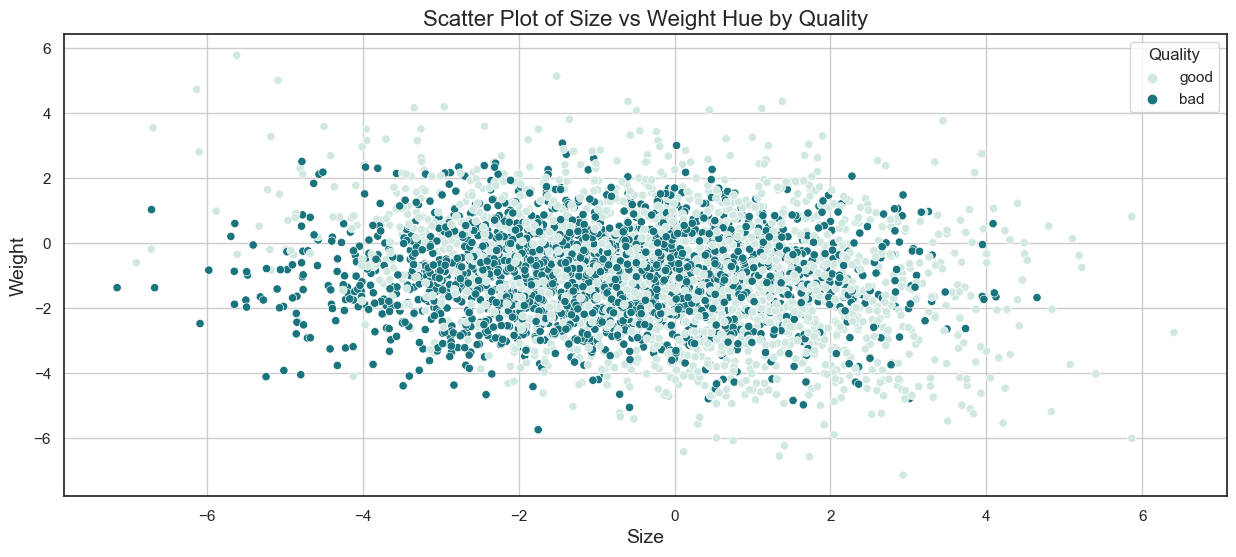

In [30]:
# Scatter Plot | to Show Size vs Weight RealtionShip
advanced_scatter_plot('Size', 'Weight', 'Quality', df)

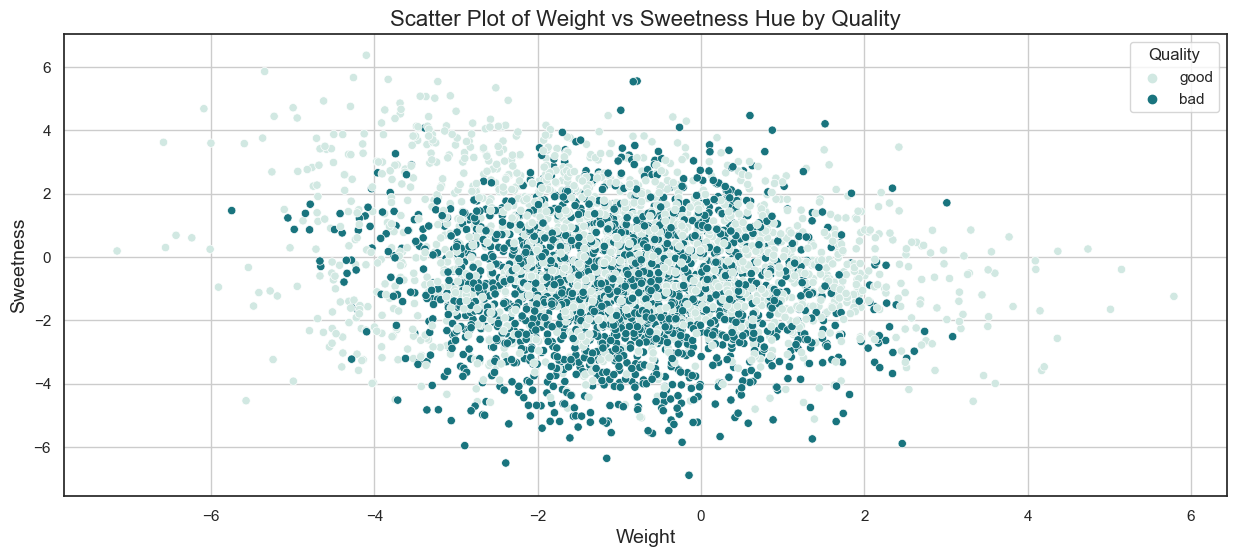

In [31]:
# # Scatter Plot | to Show Weight vs Sweetness RealtionShip
advanced_scatter_plot('Weight', 'Sweetness', 'Quality', df)

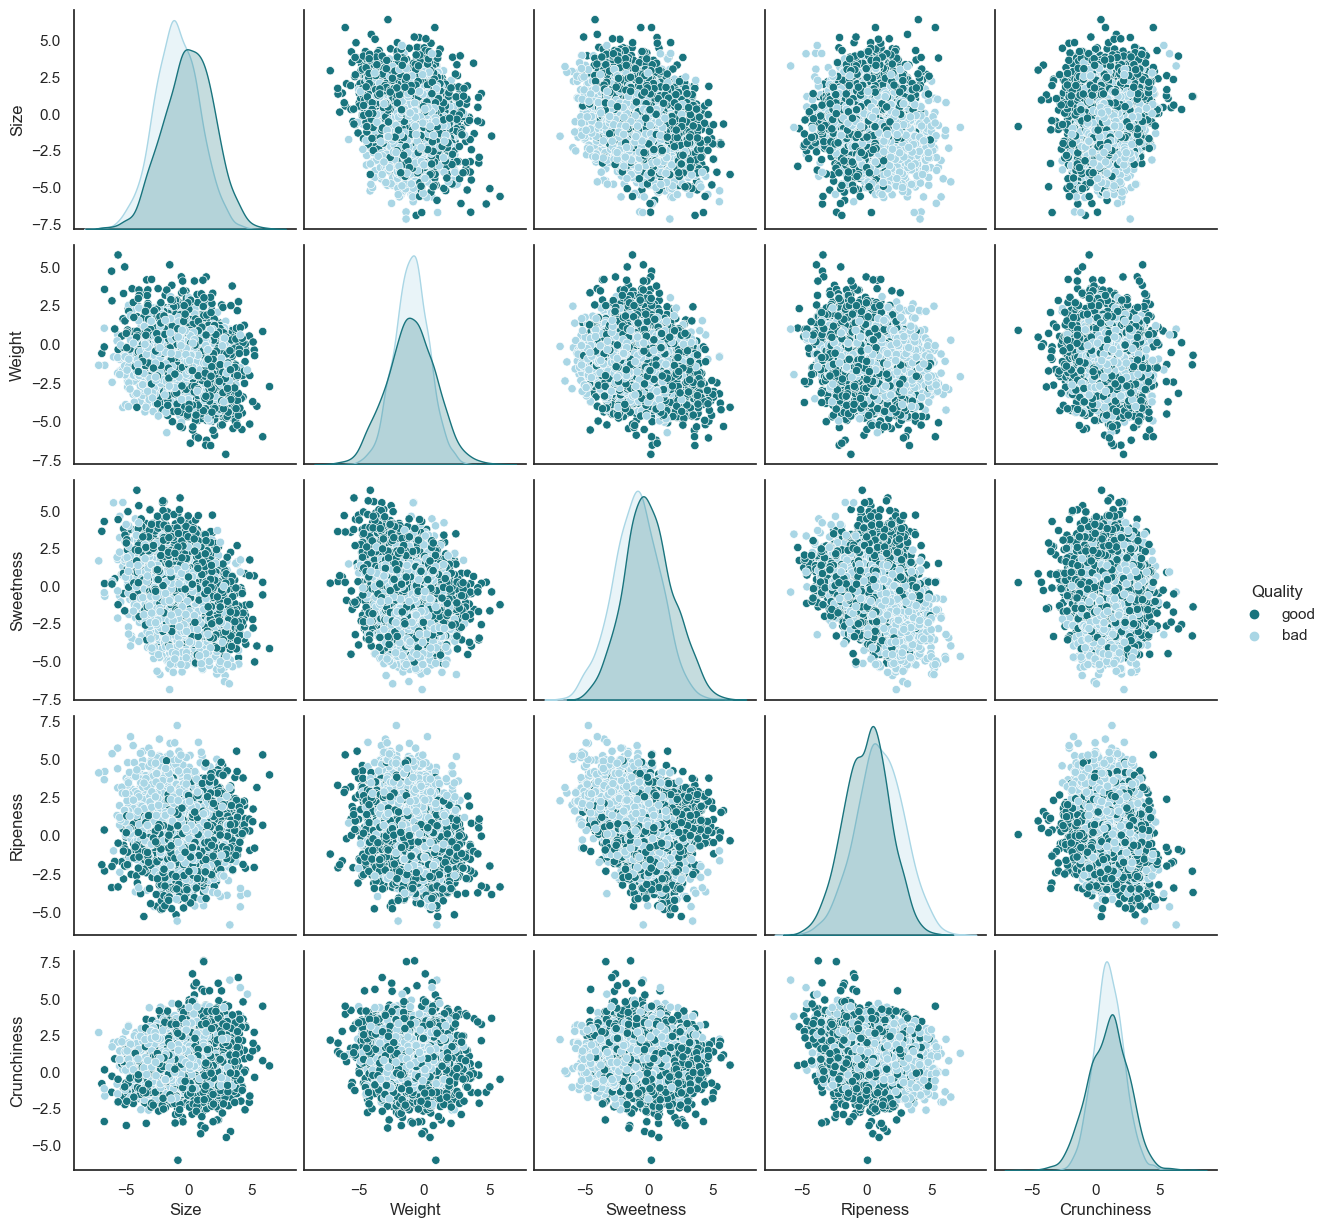

In [32]:
# Cols to Plot 
columns_to_plot = ['Size','Quality', 'Weight', 'Sweetness', 'Ripeness',
                   'Crunchiness',
                   ]

# Data Columns
data_to_plot = df[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = {'good': palette[1], 'bad': palette[2], 'other': 'gray'}  

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Quality', palette=Q_colors)
plt.show()

<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Outlier Detection</p>

In [33]:
# Num _COLS 
NUM_COLS_F = [col for col in df.columns if df[col].dtype == 'float']

# BoxPLot To Identify Outliers
fig = go.Figure()

# Define the number of rows and columns for subplots
num_rows = 2  # 4 rows
num_cols = 4  # 4 columns

# Define Paellet 
palette = ["#19747E", "#A9D6E5"]

# Create subplots with appropriate titles
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=NUM_COLS_F[:num_rows * num_cols])

# Loop through each row of subplots
for i in range(num_rows):
    # Loop through each subplot in the row
    for j in range(num_cols):
        # Calculate the index of the current numerical column
        index = i * num_cols + j
        # Check if the index is within the range of available numerical columns
        if index < len(NUM_COLS_F):
            # Add a box plot for the current numerical column to the subplot
            fig.add_trace(go.Box(x=df[NUM_COLS_F[index]], name=NUM_COLS_F[index], marker_color=palette[index % len(palette)]), row=i + 1, col=j + 1)

# Update layout
fig.update_layout(height=800, width=2000, title_text="Boxplot of Numerical Columns")

# Show the plot
fig.show()

In [34]:
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

robust_scaler = RobustScaler()

df[numerical_features] = robust_scaler.fit_transform(df[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(df[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Size: 22
Number of outliers in Weight: 54
Number of outliers in Sweetness: 32
Number of outliers in Crunchiness: 47
Number of outliers in Juiciness: 32
Number of outliers in Ripeness: 24
Number of outliers in Acidity: 20


<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Numerical Feature Distribution</p>

In [35]:
# Function to Plot Numerical Distribution 
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Sex', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2 
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten() 
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):  
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        
        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'
        
        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])
    
    # Set Tight Layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

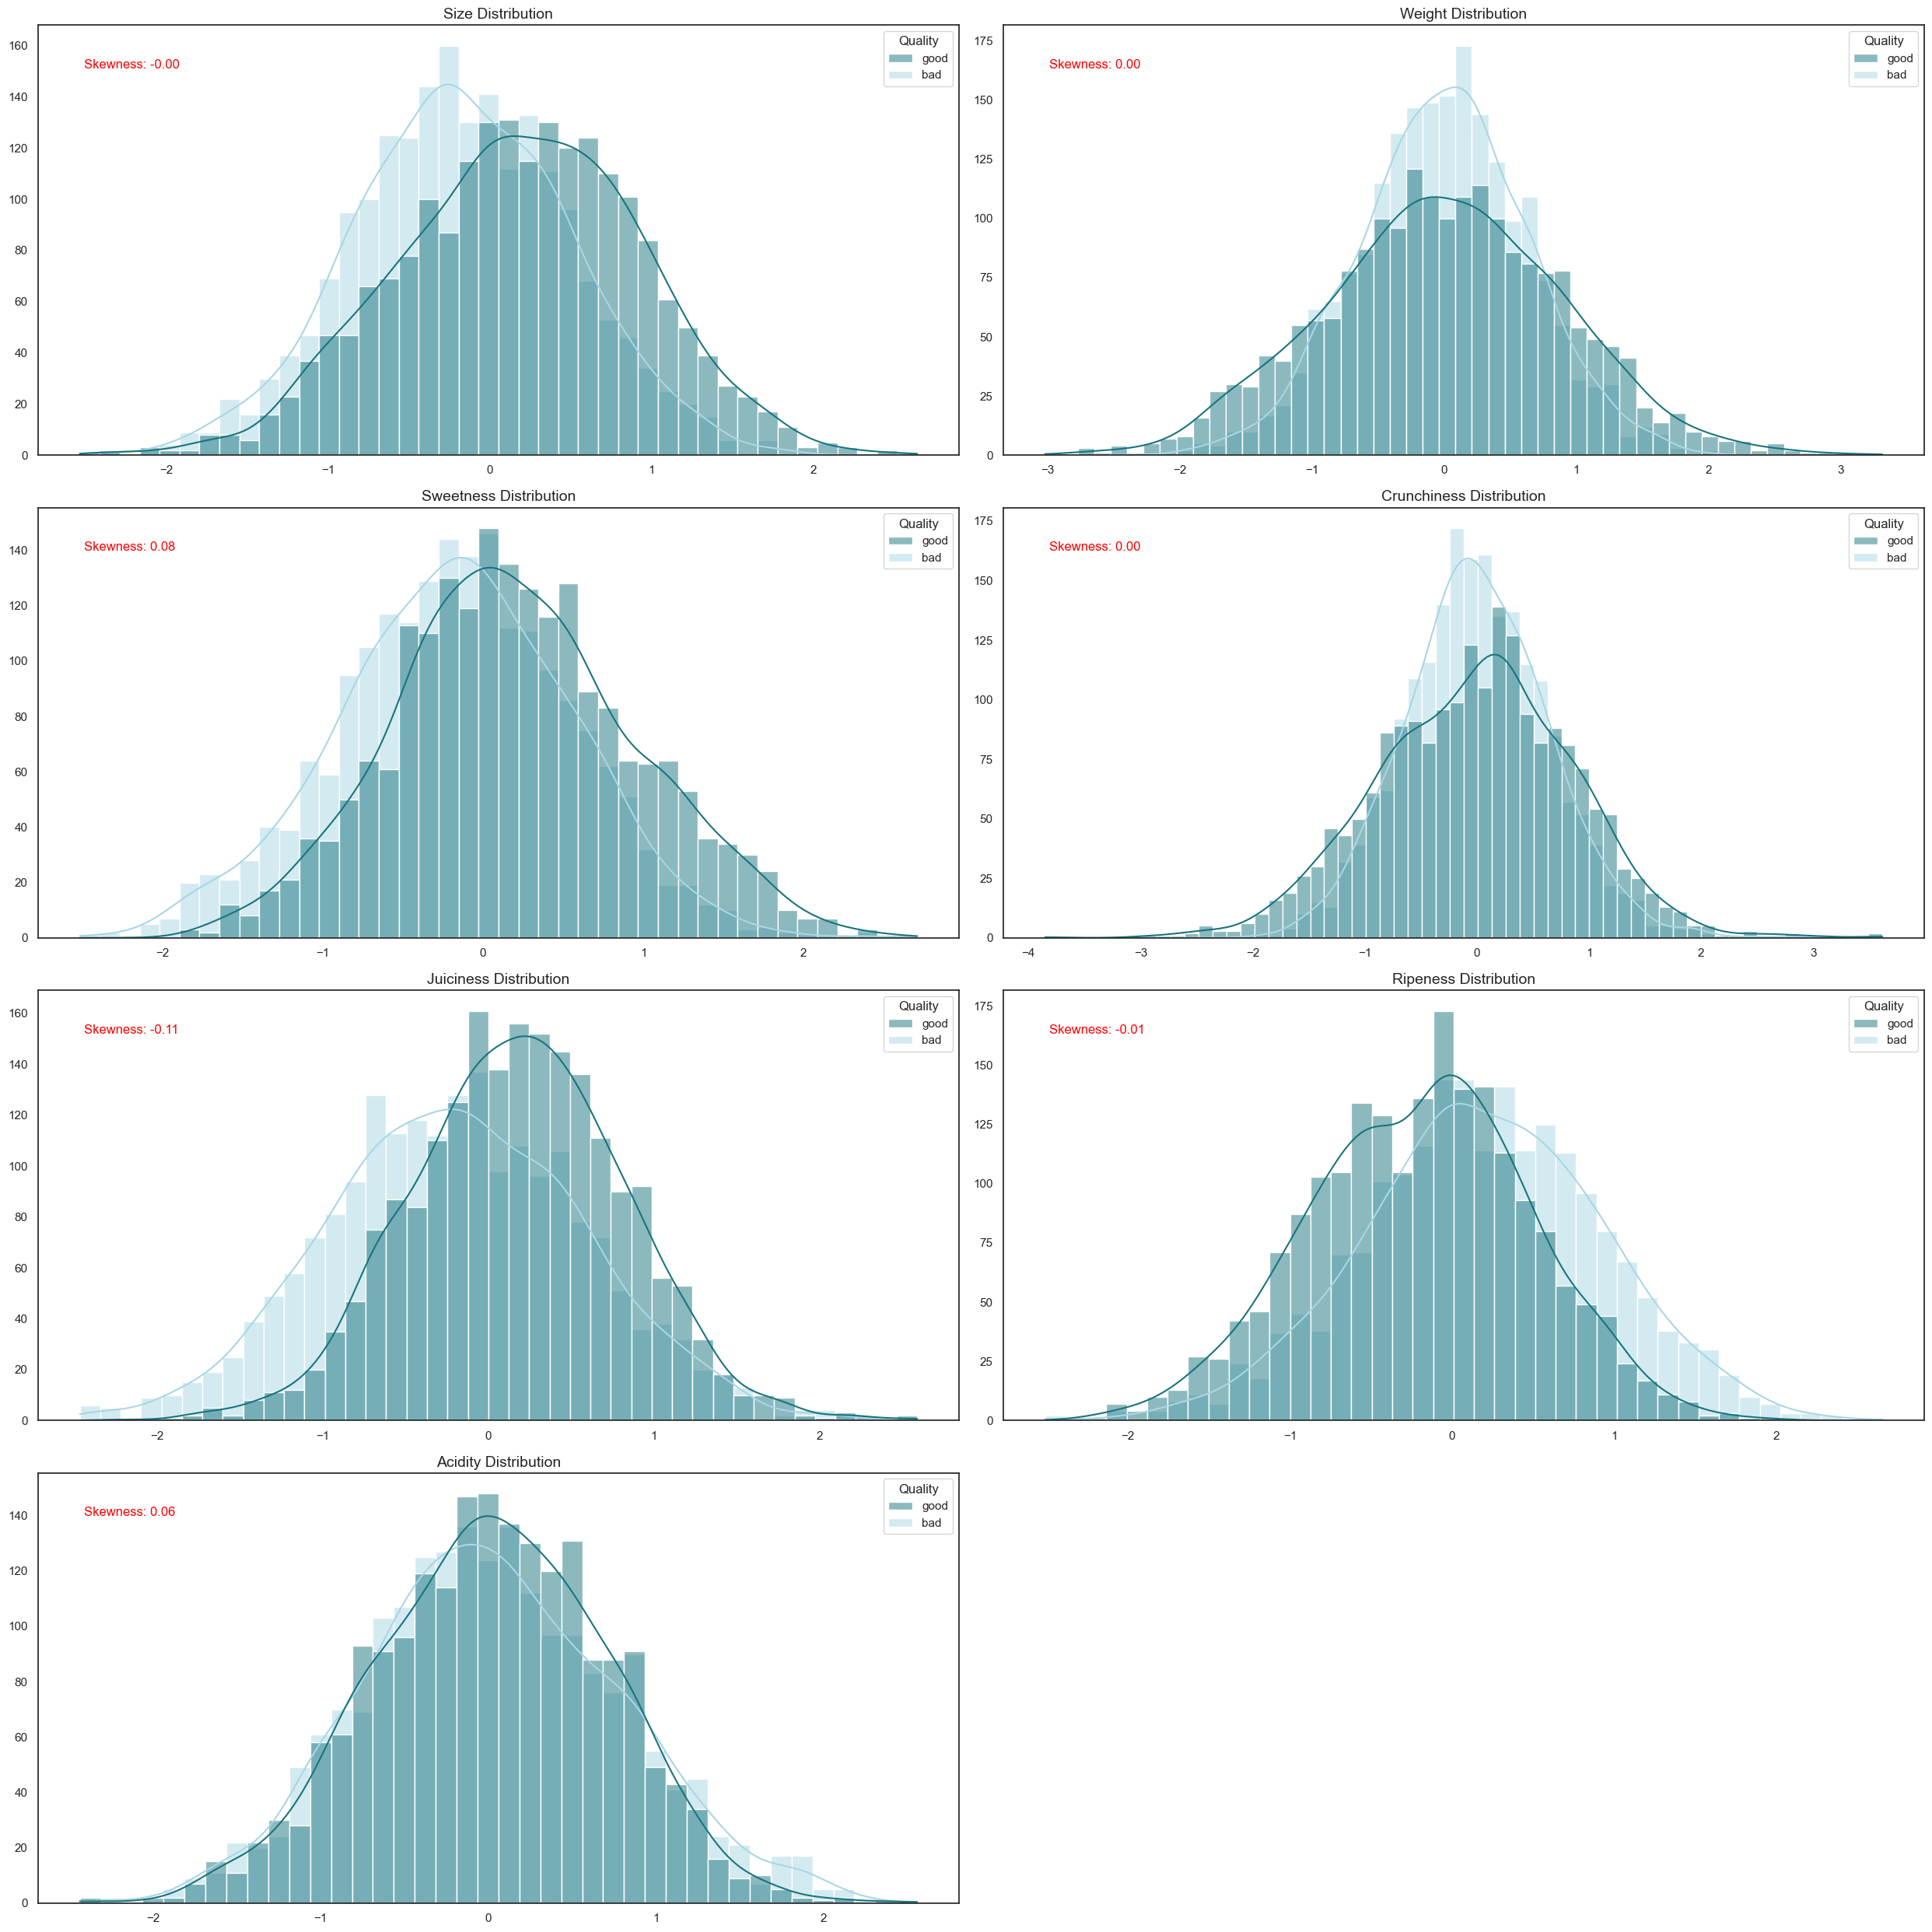

In [36]:
# Cols to Plot
NUM_COLS_F = [col for col in df.columns if df[col].dtype == 'float']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(df,NUM_COLS_F,'Quality')

<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Correlation Analysis</p>

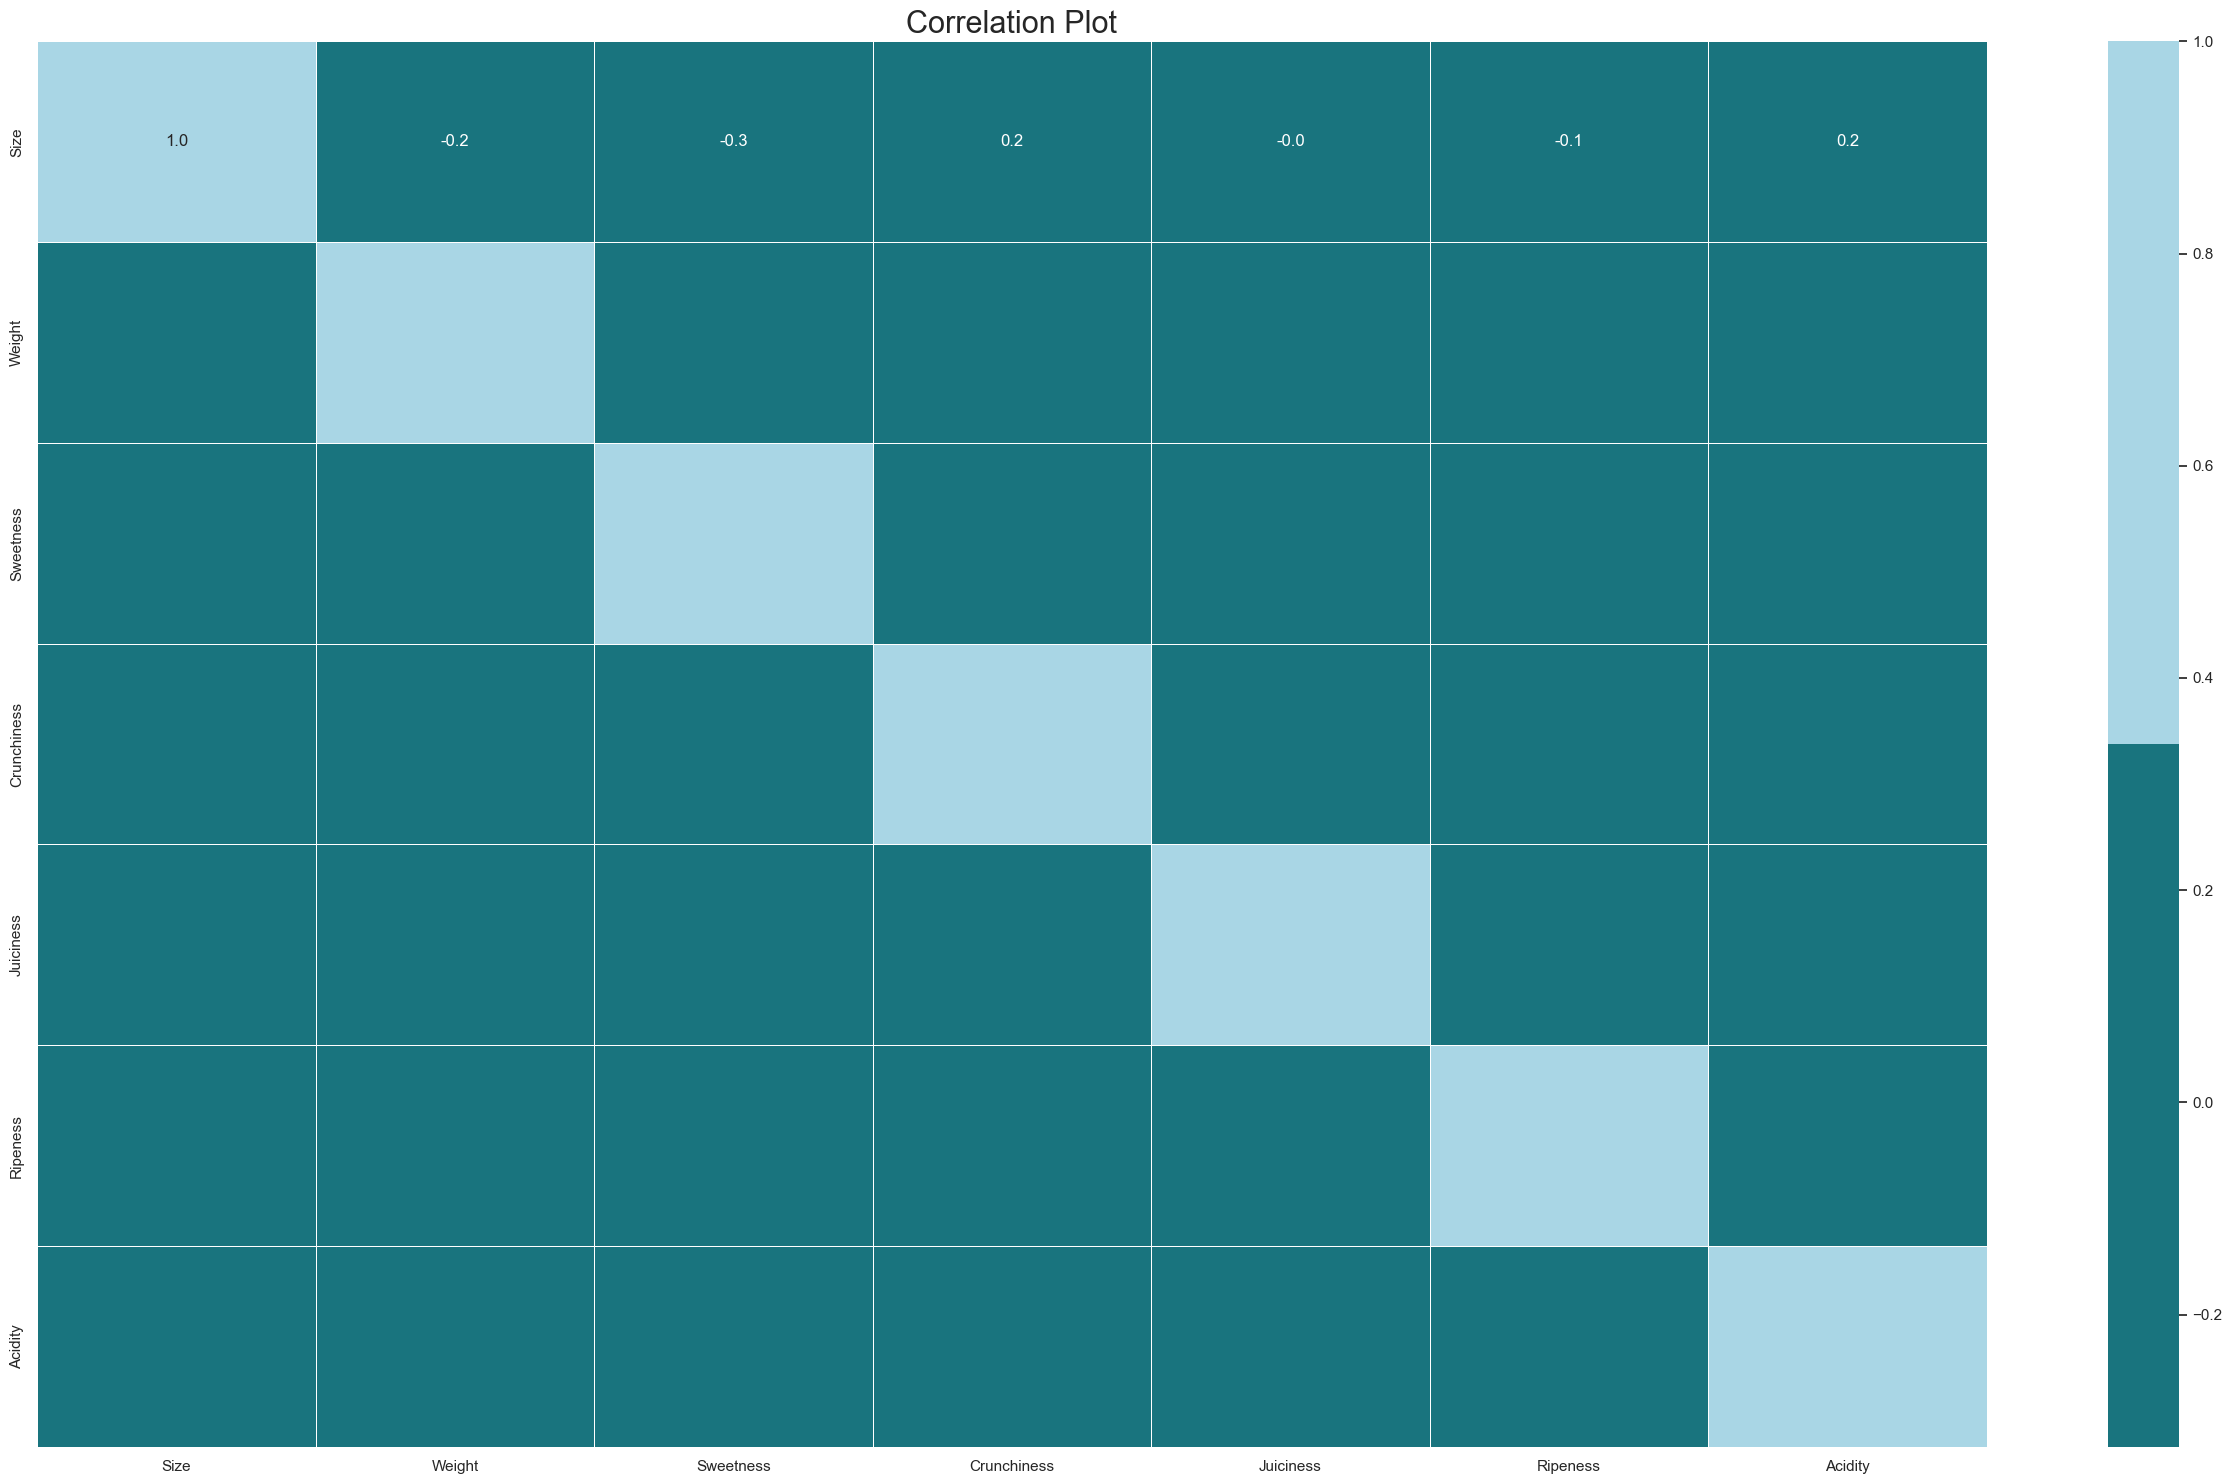

In [37]:
# Select only numeric columns
N_d = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette[0:3], fmt=".1f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

In [38]:
def clean_data(df):
    
    def label(Quality):
        """
        Transform based on the following examples:
        Quality    Output
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    df['Label'] = df['Quality'].apply(label)
    
    df.drop(columns=['Quality'], inplace=True)
    
    df = df.astype({'Label': 'int64'})
    
    return df

In [39]:
df_clean = clean_data(df.copy())
df_clean.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -1.318063 -0.747817   2.303263    -1.097620   0.496986 -0.068405 -0.178052   
1 -0.259893 -0.907856   1.641042     0.322136   0.120984  0.143460 -0.258116   
2  0.084536 -0.179438  -0.485631    -0.732125   0.873791 -0.213358  0.899966   
3 -0.054721 -0.629980   0.720229    -0.598494   1.176884 -1.543490  0.265975   
4  0.716137 -0.152675   0.047277    -0.847000   0.946685 -0.712125  0.165993   

   Label  
0      0  
1      0  
2      1  
3      0  
4      0

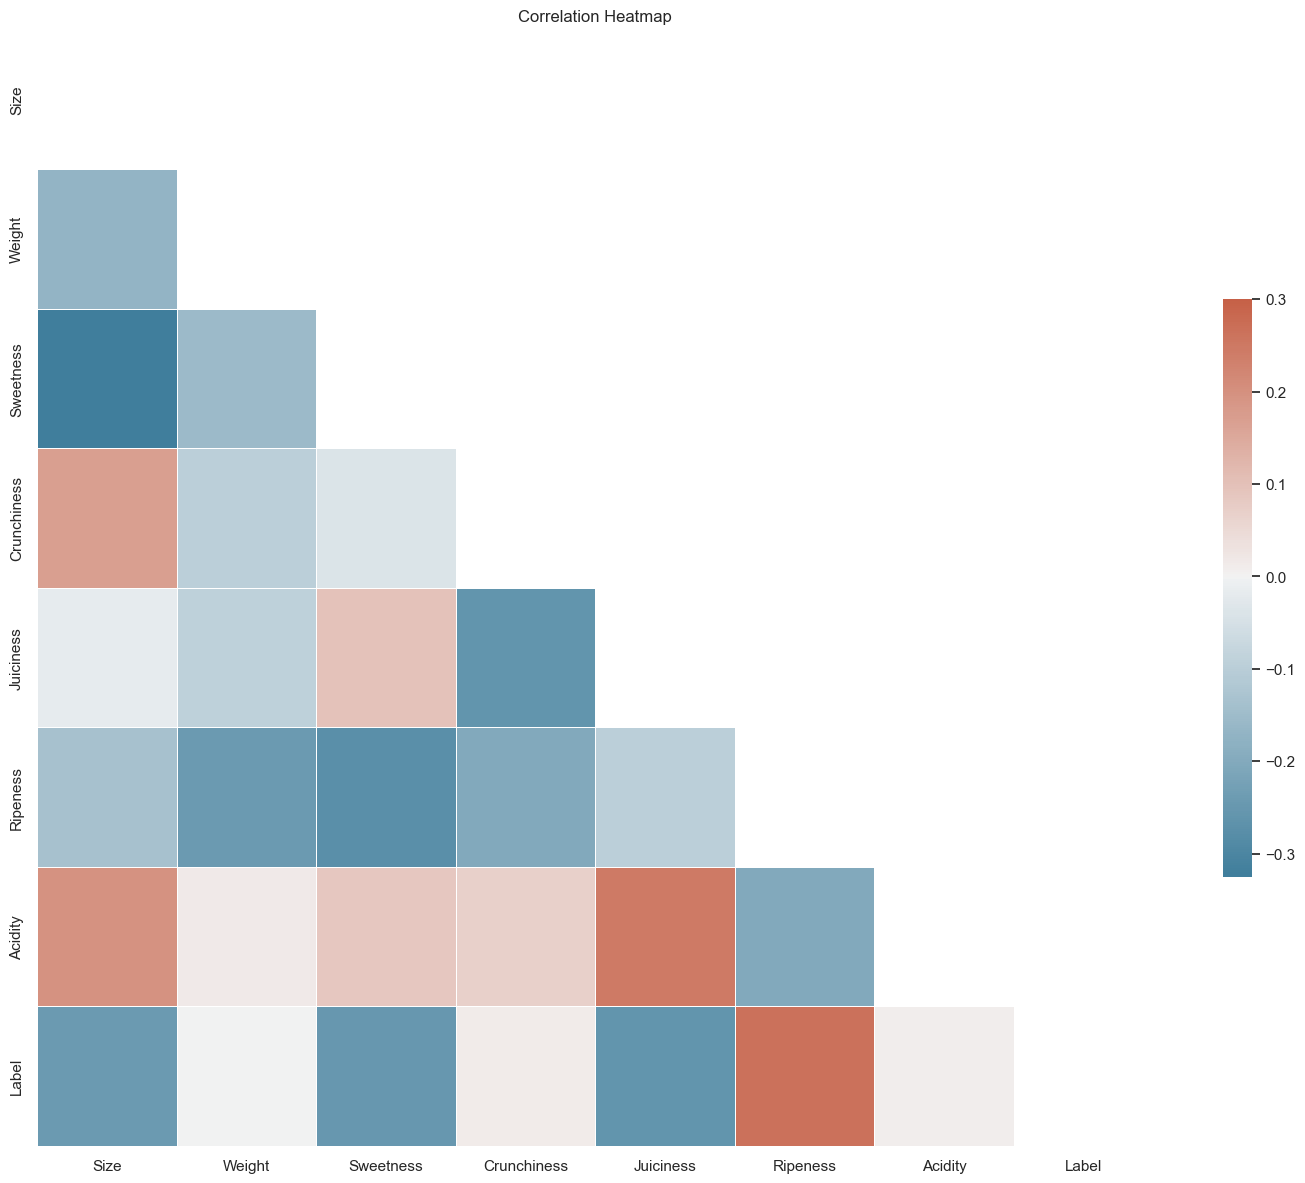

In [40]:
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Model Building</p>

In [41]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = df_clean.drop('Label', axis=1)
y_T = df_clean['Label']

# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")

Training set shape - X: (3600, 7), y: (3600,)
Testing set shape - X: (400, 7), y: (400,)


<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6.1 | LightGBM Classifier </p>

#### ***Code Working***
```python
L_BASE = lgb.LGBMClassifier(**lgb_params)
```
This line creates an instance of the LightGBM classifier (`L_BASE`) with the specified parameters (`**lgb_params`).

```python
V_CV = cross_val_score(L_BASE,
                       X_T, 
                       y_T, 
                       scoring='roc_auc',
                       cv=10, 
                       n_jobs=-1)
```
Using cross-validation (`cross_val_score`), we evaluate the performance of the LightGBM classifier (`L_BASE`) on the training data (`X_T`, `y_T`) using ROC AUC as the scoring metric. We perform 10-fold cross-validation (`cv=10`) and utilize all available CPU cores (`n_jobs=-1`).

```python
print_heading(f"The Average ROC AUC Of LGB Classifier is : {V_CV.mean()}")
```
Finally, we print the average ROC AUC score of the LightGBM classifier calculated from the cross-validation results stored in `V_CV.mean()`. The `print_heading` function is used to format the output with a header.

In [42]:
# # # =================================================================================================================
# # #                         Params < LGB Classifier
# # #================================================================================================================== 
lgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 6,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'num_leaves': 50,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1
}
# # # =================================================================================================================
# # #                        Train < LGB Classifier
# # #================================================================================================================== 
L_BASE = lgb.LGBMClassifier(**lgb_params)
V_CV = cross_val_score(L_BASE,
                       X_T, 
                       y_T, 
                       scoring='roc_auc',
                       cv=10, 
                       n_jobs=-1)
# # # =================================================================================================================
# # #                        ROC AUC < LGB Classifier
# #==================================================================================================================
print_heading(f"The Average ROC AUC Of LGB Classifier is : {V_CV.mean()}")

The Average ROC AUC Of LGB Classifier is : 0.9596320821145529


<a id="Import"></a>
# <p style="background-color: #19747E; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6.1 | CatBoost Classifier</p>

In [43]:
# # # =================================================================================================================
# # #                        Params < CAT Classifier
# # #================================================================================================================== 
cat_params = {
    'n_estimators': 853,
    'learning_rate': 0.10899577626375372,
    'depth': 7,
    'subsample': 0.998357427917925,
    'colsample_bylevel': 0.7340962061535496,
    'random_strength': 6.262882561405091,
    'min_data_in_leaf': 92,
    'verbose': 0
} 
# # # =================================================================================================================
# # #                        Train < CAT Classifier
# # #================================================================================================================== 
C_BASE = CatBoostClassifier(**cat_params)
C_CV = cross_val_score(C_BASE,
                       X_T, 
                       y_T, 
                       scoring='roc_auc',
                       cv=5, 
                       n_jobs=-1)
# # # =================================================================================================================
# # #                        ROC AUC < CAT Classifier
# # #================================================================================================================== 
print_heading(f"The Average ROC AUC Of CatBoost Classifier is: {C_CV.mean()}")

The Average ROC AUC Of CatBoost Classifier is: 0.9645060763426647


- The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of the model's ability to distinguish between the positive and negative classes. It ranges from 0 to 1, with a higher value indicating better performance.

- The PR AUC (Precision-Recall Area Under the Curve) score for Class 1 measures the precision and recall trade-off specifically for the positive class. It ranges from 0 to 1, with a higher value indicating better performance.

When to Use Each Metric:

- ROC AUC: measures the ability of the model to distinguish between positive and negative classes.

    - When you care about the model's ability to rank predictions correctly.
    - When dealing with imbalanced datasets.
    - When you need a threshold-independent measure of performance.

- Accuracy: Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total instances.

    - When classes are balanced.
    - When you need a simple, overall measure of correctness.
    - When both false positives and false negatives carry similar costs.

- Precision: Precision (also called Positive Predictive Value) measures the ratio of true positives to the total predicted positives.

    - When false positives are more problematic than false negatives like medical diagnosis where a false positive can lead to unnecessary interventions..
    - When you need to minimize the number of incorrect positive predictions.
    - When dealing with imbalanced datasets and the cost of false positives is high.

In [44]:
#Validation function
n_folds = 5

def accuracy_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)
    return(scores)
def precision_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, scoring='precision', cv=kf)
    return(scores)

In [45]:
score = accuracy_cv(L_BASE, X_TE, Y_TE)
print("LGB Classifier: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = precision_cv(L_BASE, X_TE, Y_TE)
print("LGB Classifier: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

<IPython.core.display.Javascript object>

LGB Classifier: 0.7950 (0.0400)



<IPython.core.display.Javascript object>

LGB Classifier: 0.8268 (0.0575)



In [46]:
score = accuracy_cv(C_BASE, X_TE, Y_TE)
print("CatBoost Classifier: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = precision_cv(C_BASE, X_TE, Y_TE)
print("CatBoost Classifier: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

<IPython.core.display.Javascript object>

CatBoost Classifier: 0.8275 (0.0436)



<IPython.core.display.Javascript object>

CatBoost Classifier: 0.8427 (0.0251)



In [47]:
classification_models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LogisticRegression":  LogisticRegression()
}

hyperparameter_grids = {
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'max_features': ['sqrt', 'log2'],
        'criterion': [None, 'entropy', 'gini']
    },

    "GradientBoostingClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'max_depth': [3, 5, 7]
    },

    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },

    "AdaBoostClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'algorithm': ['SAMME', 'SAMME.R']
    },

    "XGBClassifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01],
        'max_depth': [3, 5, 7]
    },

    "LogisticRegression": {
        'max_iter': [100, 1000]
    }
}

In [48]:
%%time
best_params_grids = {}
np.random.seed(10)
# searching through all possible variations of the hyperparameters for each model to find the best one
for model_name, params in hyperparameter_grids.items():
  gs_model = GridSearchCV(classification_models[model_name],
                          param_grid=params,
                          scoring='accuracy',
                          n_jobs=-1)
  gs_model.fit(X_TR, Y_TR)
  best_params_grids[model_name] = gs_model.best_params_

CPU times: total: 10.8 s
Wall time: 38.9 s


In [49]:
best_params_grids

{'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 20,
  'max_features': 'log2',
  'n_estimators': 200},
 'GradientBoostingClassifier': {'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 200},
 'KNeighborsClassifier': {'n_neighbors': 7, 'p': 2, 'weights': 'distance'},
 'AdaBoostClassifier': {'algorithm': 'SAMME.R',
  'learning_rate': 0.01,
  'n_estimators': 200},
 'XGBClassifier': {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200},
 'LogisticRegression': {'max_iter': 100}}

In [50]:
tuned_classification_models = {
    "RandomForestClassifier": RandomForestClassifier(**best_params_grids['RandomForestClassifier']),
    "GradientBoostingClassifier": GradientBoostingClassifier(**best_params_grids['GradientBoostingClassifier']),
    "KNeighborsClassifier": KNeighborsClassifier(**best_params_grids['KNeighborsClassifier']),
    "AdaBoostClassifier": AdaBoostClassifier(**best_params_grids['AdaBoostClassifier']),
    "XGBClassifier": XGBClassifier(**best_params_grids['XGBClassifier']),
    "LogisticRegression": LogisticRegression(**best_params_grids['LogisticRegression'])
}

In [51]:
%%time

# where the results will be stored
classification_results = {}
cross_val_results = {}

np.random.seed(10)
# Loop through the items in the tuned_regression_models dictionary
for model_name, model in tuned_classification_models.items():

    # Fit the model to the training data
    print(f"Fitting {model_name}...")
    model.fit(X_TR, Y_TR)

    kf = KFold(n_splits=5)

    # Score the model on the test data appending the model_name to the results dictionary using mean squared error (competition metric) and cross validation
    print(f"Scoring {model_name}...")
    cross_val_results[model_name] = cross_val_score(model,
                                                     X_TE,
                                                     Y_TE,
                                                     scoring='accuracy',
                                                     cv=kf)
    
    preds = model.predict(X_TE)
    preds = pd.DataFrame(preds)
    classification_results[model_name] = preds

Fitting RandomForestClassifier...


<IPython.core.display.Javascript object>

Scoring RandomForestClassifier...
Fitting GradientBoostingClassifier...


<IPython.core.display.Javascript object>

Scoring GradientBoostingClassifier...
Fitting KNeighborsClassifier...


<IPython.core.display.Javascript object>

Scoring KNeighborsClassifier...
Fitting AdaBoostClassifier...


<IPython.core.display.Javascript object>

Scoring AdaBoostClassifier...
Fitting XGBClassifier...


<IPython.core.display.Javascript object>

Scoring XGBClassifier...
Fitting LogisticRegression...


<IPython.core.display.Javascript object>

Scoring LogisticRegression...
CPU times: total: 24.4 s
Wall time: 13 s


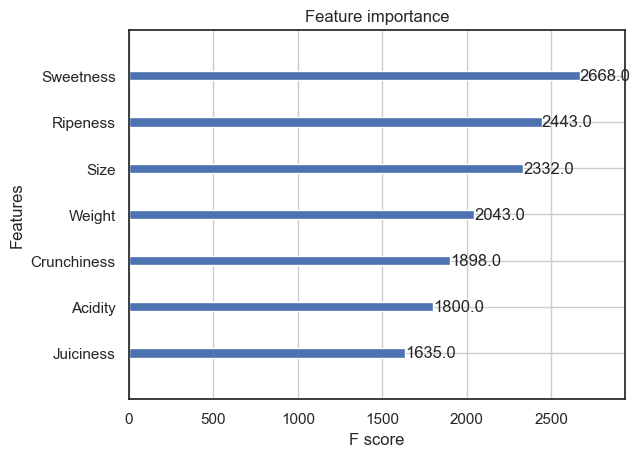

In [54]:
xgb.plot_importance(tuned_classification_models['XGBClassifier'])
plt.show()

In [55]:
precision_results = {}
accuracy_results = {}
confusion_matrices = {}
classification_reports = {}
tn = {}
fp = {} 
fn = {} 
tp = {}
recall = {}
f1 = {}
specificity = {}

for model, dataframe in classification_results.items():
    precision_results[model] = precision_score(Y_TE, dataframe)
    accuracy_results[model] = accuracy_score(dataframe, Y_TE)
    confusion_matrices[model] = confusion_matrix(dataframe, Y_TE)
    tn[model], fp[model], fn[model], tp[model] = confusion_matrix(Y_TE, dataframe).ravel()
    classification_reports[model] = classification_report(dataframe, Y_TE)

    recall[model] = recall_score(Y_TE, dataframe)
    f1[model] = f1_score(Y_TE, dataframe)
    specificity[model] = tn[model] / (tn[model] + fp[model])

In [56]:
for model, dataframe in classification_results.items():
    print(model)
    print(f'Precision {round(precision_results[model], 3)}')
    print(f'Accuracy {round(accuracy_results[model], 3)}')
    print(confusion_matrices[model])
    print(classification_reports[model])
    print(f'Recall {round(recall[model], 3)}')
    print(f'F1 {round(f1[model], 3)}')
    print(f'Specificity {round(specificity[model], 3)}')
    print(f'True Positives {tp[model]}')
    print(f'False Positives {fp[model]}')
    print(f'True Negatives {tn[model]}')
    print(f'False Negatives {fn[model]}\n')

RandomForestClassifier
Precision 0.911
Accuracy 0.897
[[175  23]
 [ 18 184]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       198
           1       0.89      0.91      0.90       202

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Recall 0.889
F1 0.9
Specificity 0.907
True Positives 184
False Positives 18
True Negatives 175
False Negatives 23

GradientBoostingClassifier
Precision 0.9
Accuracy 0.885
[[173  26]
 [ 20 181]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       199
           1       0.87      0.90      0.89       201

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400

Recall 0.874
F1 0.887
Specificity 0.896
True Positives 181
False Positives 

In [57]:
cross_val_results

{'RandomForestClassifier': array([0.7125, 0.8375, 0.8625, 0.8375, 0.8   ]),
 'GradientBoostingClassifier': array([0.775 , 0.825 , 0.825 , 0.6875, 0.8   ]),
 'KNeighborsClassifier': array([0.8125, 0.9125, 0.8625, 0.775 , 0.8875]),
 'AdaBoostClassifier': array([0.6375, 0.6875, 0.65  , 0.7625, 0.65  ]),
 'XGBClassifier': array([0.775 , 0.8   , 0.8375, 0.8375, 0.825 ]),
 'LogisticRegression': array([0.7625, 0.75  , 0.775 , 0.775 , 0.7   ])}

In [58]:
cross_val_results = {key: abs(value) for key, value in cross_val_results.items()} # turning values positive
mean_results = {}
std_results = {}
for model, array in cross_val_results.items():
  mean_results[model] = np.mean(array)
  std_results[model] = np.std(array)
  print("mean of " + model + " is " + str(np.mean(array)))
  print("standard deviation of " + model + " is " + str(np.std(array)))
  print("--------------------------")

mean of RandomForestClassifier is 0.8099999999999999
standard deviation of RandomForestClassifier is 0.0526782687642637
--------------------------
mean of GradientBoostingClassifier is 0.7825
standard deviation of GradientBoostingClassifier is 0.050990195135927834
--------------------------
mean of KNeighborsClassifier is 0.85
standard deviation of KNeighborsClassifier is 0.04999999999999998
--------------------------
mean of AdaBoostClassifier is 0.6775
standard deviation of AdaBoostClassifier is 0.04568916720624265
--------------------------
mean of XGBClassifier is 0.8150000000000001
standard deviation of XGBClassifier is 0.02423839928708164
--------------------------
mean of LogisticRegression is 0.7525000000000001
standard deviation of LogisticRegression is 0.02783882181415013
--------------------------


In [59]:
best_mean_model_name = max(mean_results, key=mean_results.get)
best_std_model_name = min(std_results, key=std_results.get)

if best_mean_model_name == best_std_model_name:
    print("Model has both the highest mean and lowest standard deviation.")
else:
    print("Model does not have both the highest mean and lowest standard deviation.")

best_model = tuned_classification_models[best_mean_model_name]
best_model

Model does not have both the highest mean and lowest standard deviation.


KNeighborsClassifier(n_neighbors=7, weights='distance')